<a href="https://colab.research.google.com/github/rjnakano/manejo-inventarios-pdg/blob/main/Notebooks/QTYVAR051521.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade kmodes

In [2]:
from google.colab import drive
import pathlib
import pandas as pd
import numpy as np
from pylab import *

from sklearn.preprocessing import StandardScaler

from kmodes.kprototypes import KPrototypes

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()

from plotnine import *
import plotnine

In [3]:
plot_kwds = {'alpha' : 0.5, 's' : 1, 'linewidths':0}

In [4]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Dataset de inventarios sin dimensiones de los productos
data1 = pd.read_csv("/content/gdrive/MyDrive/TDGdata/dfstd050621.csv")

In [6]:
data1['AISLE']=data1['AISLE'].astype(str)

In [7]:
data1.dtypes

AISLE        object
IG           object
HTS          object
PLANNING     object
ABC          object
UOM          object
CAT          object
COSTX       float64
QTYVAR      float64
dtype: object

In [8]:
data1.head(5)

,AISLE,IG,HTS,PLANNING,ABC,UOM,CAT,COSTX,QTYVAR
0,17,IG56,HTS119,1/1,B,PC,CAT17,-0.029976,-0.053250
1,17,IG56,HTS119,1/1,B,PC,CAT17,0.092472,-0.022999
2,17,IG56,HTS119,1/1,C,PC,CAT17,0.266130,0.004373
3,17,IG56,HTS119,1/1,B,PC,CAT17,-0.025112,-0.060323
4,15,IG56,HTS119,1/1,C,PC,CAT17,-0.077982,-0.062534


In [9]:
# scikit-learn bootstrap
from sklearn.utils import resample

In [10]:
data1.shape[0]

16239

In [11]:
catColumnsPos = [data1.columns.get_loc(col) for col in list(data1.select_dtypes('object').columns)]

In [12]:
catColumnsPos

[0, 1, 2, 3, 4, 5, 6]

In [13]:
# Fit the cluster 
k = 2
gamma = 0.5
import time
start_time = time.time()
kprototype = KPrototypes(n_jobs = -1, n_clusters = k, init = 'Huang', gamma = gamma, random_state = 0)
kprototype.fit_predict(data1, categorical = catColumnsPos)
print("--- %s seconds ---" % (time.time() - start_time))

--- 65.95037817955017 seconds ---


In [14]:
data1['Cluster'] = kprototype.labels_

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


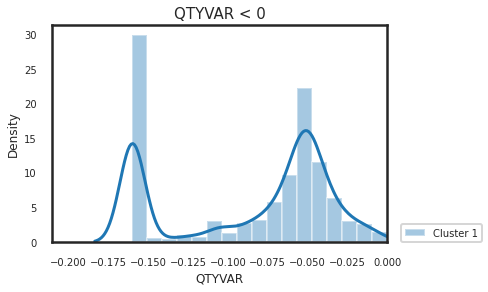

In [30]:
plot = sns.distplot(data1.loc[(data1['Cluster']==1) & (data1['QTYVAR'] < 0),'QTYVAR'], label= 'Cluster {}'.format(1));
plot.axes.set_title("QTYVAR < 0",fontsize=15)
plot.set_xlabel("QTYVAR",fontsize=12)
plot.set_ylabel("Density",fontsize=12)
plot.tick_params(labelsize=10)
plot.legend(loc=(1.04,0), fontsize=10)
plot.set(xlim=(-0.21, 0))

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


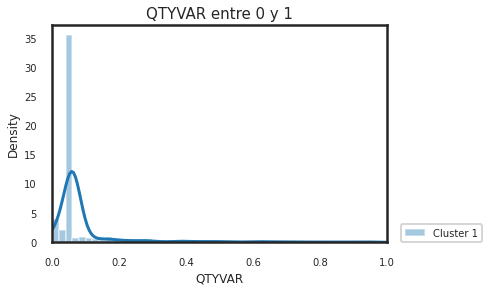

In [39]:
plot = sns.distplot(data1.loc[(data1['Cluster']==1) & (data1['QTYVAR'] >= 0) & (data1['QTYVAR'] < 1),'QTYVAR'], label= 'Cluster {}'.format(1));
plot.axes.set_title("QTYVAR entre 0 y 1",fontsize=15)
plot.set_xlabel("QTYVAR",fontsize=12)
plot.set_ylabel("Density",fontsize=12)
plot.tick_params(labelsize=10)
plot.legend(loc=(1.04,0), fontsize=10)
plot.set(xlim=(0, 1))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


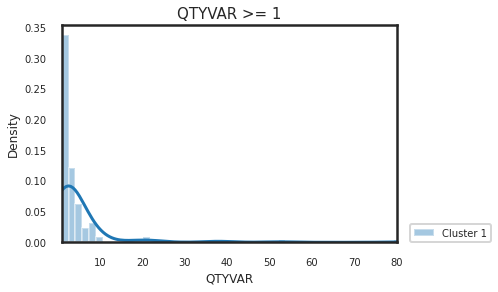

In [42]:
plot = sns.distplot(data1.loc[(data1['Cluster']==1) & (data1['QTYVAR'] >= 1),'QTYVAR'], label= 'Cluster {}'.format(1));
plot.axes.set_title("QTYVAR >= 1",fontsize=15)
plot.set_xlabel("QTYVAR",fontsize=12)
plot.set_ylabel("Density",fontsize=12)
plot.tick_params(labelsize=10)
plot.legend(loc=(1.04,0), fontsize=10)
plot.set(xlim=(1, 80))
plt.show()